In [1]:
import numpy as np 
import pandas as pd 
#import modin.pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
orig_df = pd.read_csv('../../data/data/datastorm_policy_data.csv')


f:\JetBrain Project Files\Pycharm\DataStorm-Final-2021\venv\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
orig_df.head()
print(orig_df.info())
print(orig_df.isnull().sum())

,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,...,child5_gender,payment_method,main_holder_occupation,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code
0,249.0,20,M,INFORCE,2011/08/21,2019/02/21,NaN,NaN,M,1983/10/01,...,NaN,CASH,NaN,20190131,20200701,C108223,AG108847,HE001,HEALTH,POL28535
1,165.0,15,M,INFORCE,2006/07/14,2019/09/14,NaN,NaN,F,1958/01/01,...,NaN,CASH,BUSINESSMAN,20190901,20200701,C103349,AG103677,RE001,RETIREMENT,POL27771
2,330.0,20,Y,INFORCE,2018/12/28,2019/12/28,NaN,NaN,M,1967/11/01,...,NaN,CASH,RECYCLE RACERS,20191101,20200701,C120388,AG103249,IN001,INVESTMENT,POL29786
3,415.0,15,Q,INFORCE,2018/11/06,2020/02/06,NaN,NaN,M,1989/10/01,...,NaN,CHEQUE,RECEPTIONIST,20191201,20200701,C113155,AG106733,HE001,HEALTH,POL24635
4,165.0,15,M,LAPSED,2012/04/28,2015/06/28,NaN,OTHERS,M,1988/05/01,...,NaN,CASH,BUSINESSMAN,20190228,20200701,C106155,AG106907,HE001,HEALTH,POL7470


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631422 entries, 0 to 631421
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   main_holder_occupation_cd  631355 non-null  float64
 1   policy_term                631422 non-null  int64  
 2   policy_payment_mode        631422 non-null  object 
 3   policy_status              631422 non-null  object 
 4   commencement_dt            631422 non-null  object 
 5   next_due_dt                631422 non-null  object 
 6   termination_dt             22609 non-null   object 
 7   termination_reason         65133 non-null   object 
 8   main_holder_gender         631422 non-null  object 
 9   main_holder_dob            631422 non-null  object 
 10  main_holder_entry_age      631422 non-null  int64  
 11  main_holder_smoker_flag    631422 non-null  object 
 12  spouse_gender              120206 non-null  object 
 13  spouse_dob                 12

In [4]:
print(orig_df.columns)

Index(['main_holder_occupation_cd', 'policy_term', 'policy_payment_mode',
       'policy_status', 'commencement_dt', 'next_due_dt', 'termination_dt',
       'termination_reason', 'main_holder_gender', 'main_holder_dob',
       'main_holder_entry_age', 'main_holder_smoker_flag', 'spouse_gender',
       'spouse_dob', 'spouse_entry_age', 'spouse_smoker_flag',
       'total_sum_assuared', 'premium_value', 'rider1_prem',
       'rider1_sum_assuared', 'rider2_prem', 'rider2_sum_assuared',
       'rider3_prem', 'rider3_sum_assuared', 'rider4_prem',
       'rider4_sum_assuared', 'rider5_prem', 'rider5_sum_assuared',
       'rider6_prem', 'rider6_sum_assuared', 'rider7_prem',
       'rider7_sum_assuared', 'rider8_prem', 'rider8_sum_assuared',
       'rider9_prem', 'rider9_sum_assuared', 'rider10_prem',
       'rider10_sum_assuared', 'child1_dob', 'child1_gender', 'child2_dob',
       'child2_gender', 'child3_dob', 'child3_gender', 'child4_dob',
       'child4_gender', 'child5_dob', 'child5_gend

In [5]:
def month_rank(df):
    df['policy_snapshot'] = pd.to_datetime(df['policy_snapshot_as_on'],format='%Y%m%d')
    df['month_rank'] = df['policy_snapshot'].dt.year*12+df['policy_snapshot'].dt.month
    df['month_rank'] = df['month_rank'] - df['month_rank'].min()
    return df

In [6]:
up1_df = month_rank(orig_df)


In [7]:
def get_num_of_policies(df):
    n = df["policy_code"].nunique()
    return n


In [9]:
gp_df = up1_df.groupby(by=["month_rank","client_code"]).apply(get_num_of_policies).reset_index()


In [10]:
gp_df.rename(columns={0:'num_pl'},inplace=True)
gp_df.head()


,month_rank,client_code,num_pl
0,0,C100000,1
1,0,C100001,1
2,0,C100002,1
3,0,C100003,1
4,0,C100004,1


In [11]:
up1_df = pd.merge(up1_df, gp_df, on=["month_rank","client_code"])

In [12]:
up1_df.head()


,main_holder_occupation_cd,policy_term,policy_payment_mode,policy_status,commencement_dt,next_due_dt,termination_dt,termination_reason,main_holder_gender,main_holder_dob,...,policy_snapshot_as_on,run_date,client_code,agent_code,product_code,product_name,policy_code,policy_snapshot,month_rank,num_pl
0,249.0,20,M,INFORCE,2011/08/21,2019/02/21,NaN,NaN,M,1983/10/01,...,20190131,20200701,C108223,AG108847,HE001,HEALTH,POL28535,2019-01-31,1,1
1,165.0,15,M,INFORCE,2006/07/14,2019/09/14,NaN,NaN,F,1958/01/01,...,20190901,20200701,C103349,AG103677,RE001,RETIREMENT,POL27771,2019-09-01,9,1
2,330.0,20,Y,INFORCE,2018/12/28,2019/12/28,NaN,NaN,M,1967/11/01,...,20191101,20200701,C120388,AG103249,IN001,INVESTMENT,POL29786,2019-11-01,11,1
3,415.0,15,Q,INFORCE,2018/11/06,2020/02/06,NaN,NaN,M,1989/10/01,...,20191201,20200701,C113155,AG106733,HE001,HEALTH,POL24635,2019-12-01,12,2
4,415.0,15,M,LAPSED,2015/03/21,2019/03/21,NaN,NaN,M,1989/10/01,...,20191201,20200701,C113155,AG106733,RE001,RETIREMENT,POL34544,2019-12-01,12,2


In [13]:
def get_target(df):
    if df.shape[0] > 2:
        df_c = df.copy()
        sr_df = df_c.sort_values(by=["month_rank"])
        this_mon = np.delete(sr_df['num_pl'].values,0)
        next_mon = np.append(np.delete(sr_df['num_pl'].values,[0,1]),sr_df['num_pl'].values[-1])
        res_df = df_c.iloc[1:, :]
        res_df['is_added'] = next_mon-this_mon
        return res_df
    else:
        return 

In [14]:
gp1_df = up1_df.groupby(by=["client_code"]).apply(get_target)

In [15]:
gp1_df['is_added']

client_code        
C100000      65303     0
             110932    0
             200815    0
             230353    0
             313399    0
                      ..
C154448      595736    0
             608081    0
C154454      23893     0
             187300    0
             187301    0
Name: is_added, Length: 601714, dtype: int64

<AxesSubplot:xlabel='is_added', ylabel='Count'>

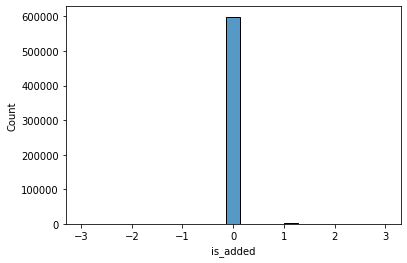

In [16]:
sns.histplot(data=gp1_df['is_added'])

In [17]:
def binarize(x):
    if x>0:
        return 1 
    else:
        return 0

In [18]:
gp1_df['is_cross_sell'] = gp1_df['is_added'].apply(binarize)

<AxesSubplot:xlabel='is_cross_sell', ylabel='Count'>

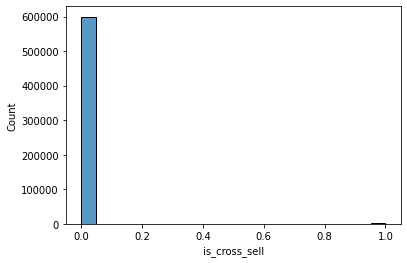

In [19]:
sns.histplot(data=gp1_df['is_cross_sell'])

In [20]:
gp1_df.to_csv('filtered.csv', index=False)